# Sampling

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
X, y = datasets.make_classification(
            n_samples     = 4000,  # number of data points
            n_classes     = 2,      # number of classes
            n_clusters_per_class=2, # The number of clusters per class 
            weights       = [0.03,0.97], # The proportions assigned to each class
            n_features    = 10,     # number of total features 
            n_informative = 2,      # number of informative features 
            n_redundant   = 2,      # number of redundant features
            random_state  = 0                       )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Original dataset shape {}'.format(Counter(y)))
print('Training dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({1: 3860, 0: 140})
Training dataset shape Counter({1: 2590, 0: 90})


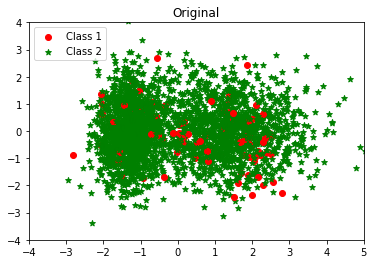

In [21]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    
plot_this(X_train,y_train,'Original')

## Under-sampling

Random undersampling Counter({1: 1000, 0: 65})


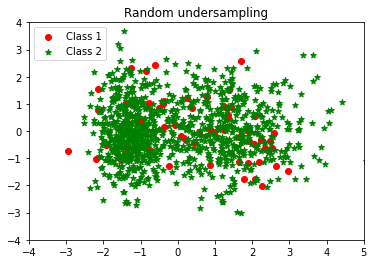

In [22]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X_train, y_train, sampling_strategy={1: 1000, 0: 65},
                      random_state=0)
print('Random undersampling {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'Random undersampling')

Random undersampling Counter({1: 1000, 0: 65})


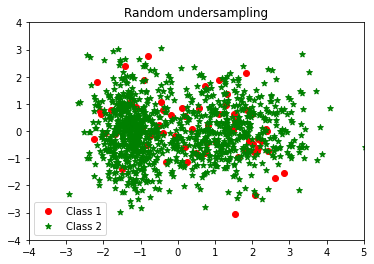

Cluster centriods undersampling Counter({1: 1000, 0: 65})


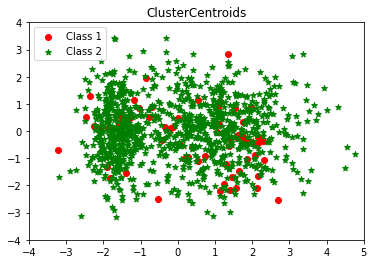

TomekLinks undersampling Counter({1: 2572, 0: 90})


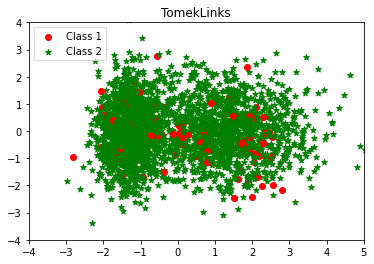

NearestNeighbours Clearning Rule undersampling Counter({1: 2542, 0: 90})


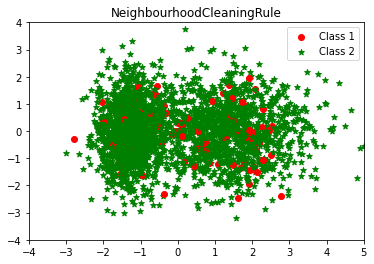

NearMissCounter({0: 90, 1: 90})


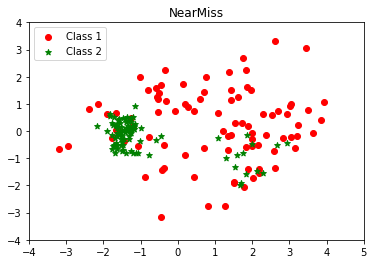

In [23]:
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
# RandomUnderSampler
sampler = RandomUnderSampler(sampling_strategy={1: 1000, 0: 65})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('Random undersampling {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'Random undersampling')

# ClusterCentroids
sampler = ClusterCentroids(sampling_strategy={1: 1000, 0: 65})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('Cluster centriods undersampling {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'ClusterCentroids')

# TomekLinks
sampler = TomekLinks()
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('TomekLinks undersampling {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'TomekLinks')

# NeighbourhoodCleaningRule
sampler = NeighbourhoodCleaningRule() 
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('NearestNeighbours Clearning Rule undersampling {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'NeighbourhoodCleaningRule')

# NearMiss
sampler = NearMiss() 
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('NearMiss{}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'NearMiss')

## Over-sampling

RandomOverSampler Counter({1: 2590, 0: 300})


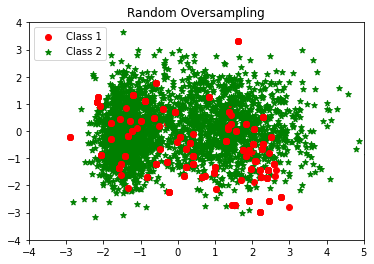

SMOTE Counter({1: 2590, 0: 300})


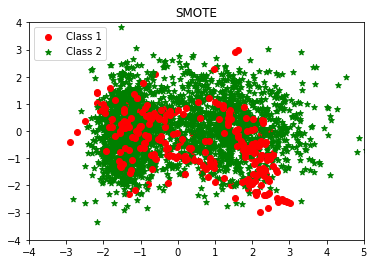

ADASYN Counter({1: 2590, 0: 300})


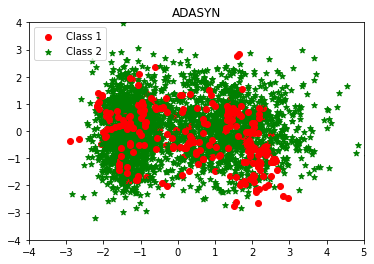

In [31]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
# RandomOverSampler
  # With over-sampling methods, the number of samples in a class
  # should be greater or equal to the original number of samples.
sampler = RandomOverSampler(sampling_strategy={1: 2590, 0: 300})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('RandomOverSampler {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs, 'Random Oversampling')

# SMOTE
sampler = SMOTE(sampling_strategy={1: 2590, 0: 300})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('SMOTE {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'SMOTE')

# ADASYN
sampler = ADASYN(sampling_strategy={1: 2590, 0: 300})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('ADASYN {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'ADASYN')